In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from disp import set_font_size

FPS = 8.5
DT = 1/FPS
NT = 300

COL_START_RSP = 6
ISTART_STIM, ISTOP_STIM = (85, 171)
LOAD_FILE = 'data/simple/baker.csv'

In [2]:
df = pd.read_csv(LOAD_FILE)
df

,EXPT_ID,STIM,LINE,FLY,ROI,ROI_USED,IT_0,IT_1,IT_2,IT_3,...,IT_290,IT_291,IT_292,IT_293,IT_294,IT_295,IT_296,IT_297,IT_298,IT_299
0,0,S,R70G01,0,somas,False,-0.286139,-0.251529,-0.214845,-0.085881,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,P,R70G01,0,somas,False,-0.090690,-0.071585,0.027546,-0.089212,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,S,R70G01,1,somas,False,-0.074163,-0.052967,-0.226459,-0.086673,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,P,R70G01,1,somas,False,-0.094280,-0.175828,-0.132839,-0.155376,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,S,R70G01,2,somas,False,-0.359071,-0.296972,-0.283760,-0.206650,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,221,P,vPN1_split,0,somas,False,0.308926,0.069519,-0.028961,-0.103122,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
444,222,S,vPN1_split,1,somas,False,0.268154,0.517779,0.526319,0.353496,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
445,222,P,vPN1_split,1,somas,False,0.563747,0.506288,0.271983,0.002747,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
446,223,S,vPN1_split,2,somas,False,0.023391,0.023677,0.009701,0.006185,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
expt_ids = np.sort(np.unique(df['EXPT_ID']))

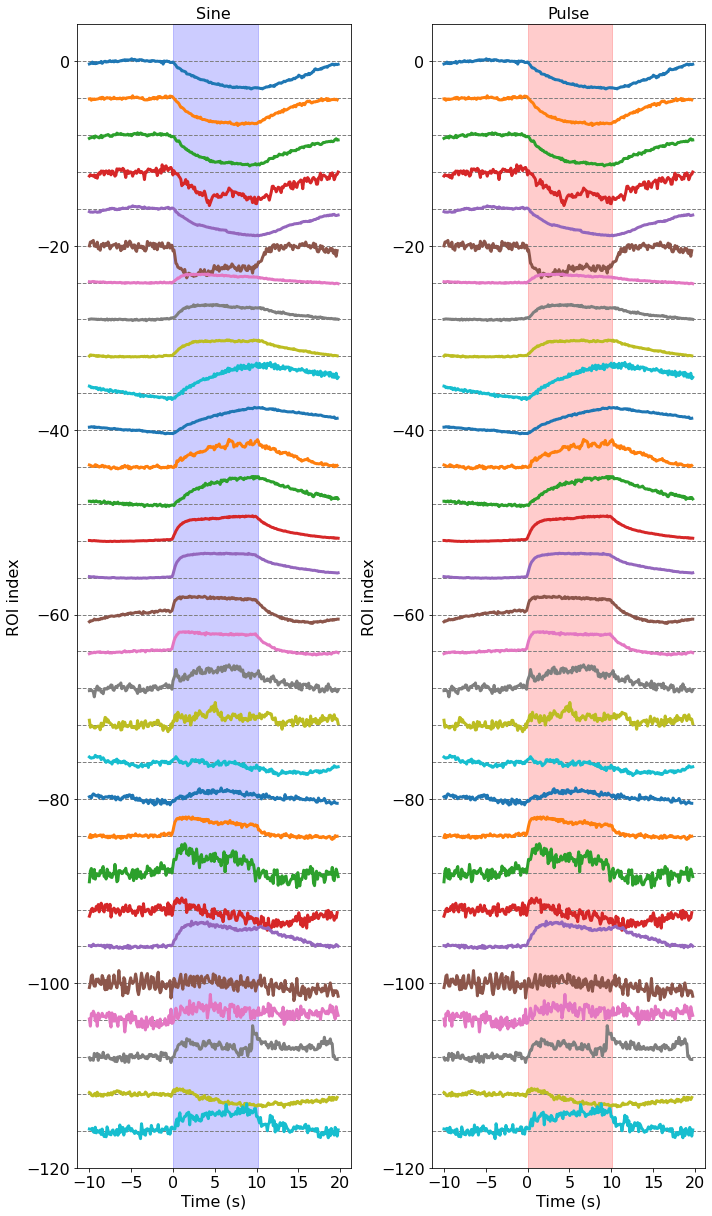

In [4]:
nroi_plot = 30
t = np.arange(NT)*DT - 10

fig, axs = plt.subplots(1, 2, figsize=(10, 17), tight_layout=True)
for cexpt, expt_id in enumerate(expt_ids[:nroi_plot]):
    # sine response
    row_s = df[(df['EXPT_ID'] == expt_id) & (df['STIM'] == 'S')]
    rsp_s = np.array(row_s).flatten()[6:]
    
    axs[0].axhline(-4*cexpt, lw=1, ls='--', c='gray')
    axs[0].plot(t, rsp_s - 4*cexpt, lw=3)
    
    # pulse response
    row_p = df[(df['EXPT_ID'] == expt_id) & (df['STIM'] == 'S')]
    rsp_p = np.array(row_p).flatten()[6:]
    
    axs[1].axhline(-4*cexpt, lw=1, ls='--', c='gray')
    axs[1].plot(t, rsp_p - 4*cexpt, lw=3)
    
for ax, c, stim in zip(axs, ['b', 'r'], ['Sine', 'Pulse']):
    ax.axvspan(t[ISTART_STIM], t[ISTOP_STIM], color=c, alpha=.2)
    ax.set_title(stim)
    ax.set_ylim(-4*nroi_plot, 4)
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('ROI index')
    
set_font_size(axs, 16)